# Лаба 1. Класифікація

Було обрано [датасет](https://archive.ics.uci.edu/dataset/763/land+mines-1) з показниками детектора мін для різних типів грунту, та різних типів наземних мін.

![table1](extras\table1.png "table2")

In [1]:
import pandas as pd

data = pd.read_csv("data\mine_data_norm.csv")
data.head(7)

,V,H,S,M
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1
5,0.240966,0.727273,0.0,1
6,0.254410,0.818182,0.0,1


Дані в таблиці вже нормалізовані, але мені не подобається їхній спосіб перетворення типів грунту в числовий формат:

| Soil Type         | Number    |
| ----------------- | --------- |
| Dry and Sandy     | 0.0       |
| Dry and Humus     | 0.2       |
| Dry and Limy      | 0.4       |
| Humid and Sandy   | 0.6       |
| Humid and Humus   | 0.8       |
| Humid and Limy    | 1.0       |

І відповідно всі алгоритми, що використовують $L_k$ метрики (або навіть просто відстані на дійсних числах по цьому виміру), будуть вважати типи грунту "Dry and Sandy" та "Humid and Limy" дуже різними, а "Dry and Limy" та "Humid and Sandy" дуже подібними.

Тому розділимо цю фічу на дві: Humidity ("Humid" та "Dry") та Soil ("Sandy", "Humus" та "Limy"); а оскільки ці типи грунту всі є різними, то застосуємо One-Hot Encoding до фічі Soil: 

| Soil Type         | Humidity  | Sandy | Humus | Limy  |
| ----------------- | --------  | ----- | ----- | ----  |
| Dry and Sandy     | 0         | 1     | 0     | 0     |
| Dry and Humus     | 0         | 0     | 1     | 0     |
| Dry and Limy      | 0         | 0     | 0     | 1     |
| Humid and Sandy   | 1         | 1     | 0     | 0     |
| Humid and Humus   | 1         | 0     | 1     | 0     |
| Humid and Limy    | 1         | 0     | 0     | 1     |


In [5]:
data['SH'] = (data.loc[:, 'S'] < 0.5).astype(float)

data['ST'] = (data.loc[:, 'S'] * 10) % 6
data_encoded = pd.get_dummies(data, columns=['ST', ])
data_encoded[['ST_0.0', 'ST_2.0', 'ST_4.0']] = data_encoded[['ST_0.0', 'ST_2.0', 'ST_4.0']].astype(float)



DF = data_encoded[['V', 'H', 'SH', 'ST_0.0', 'ST_2.0', 'ST_4.0', 'M']]
DF = DF.rename(columns={'V': 'Voltage', 'H': 'Height', 'SH': 'Humidiy', 'ST_0.0': 'Sandy', 
                   'ST_2.0': 'Humus', 'ST_4.0': 'Limy', 'M': 'Mine'})
DF.head(20)

,Voltage,Height,Humidiy,Sandy,Humus,Limy,Mine
0,0.338157,0.000000,1.0,1.0,0.0,0.0,1
1,0.320241,0.181818,1.0,1.0,0.0,0.0,1
2,0.287009,0.272727,1.0,1.0,0.0,0.0,1
3,0.256284,0.454545,1.0,1.0,0.0,0.0,1
4,0.262840,0.545455,1.0,1.0,0.0,0.0,1
5,0.240966,0.727273,1.0,1.0,0.0,0.0,1
6,0.254410,0.818182,1.0,1.0,0.0,0.0,1
7,0.234924,1.000000,1.0,1.0,0.0,0.0,1
8,0.353474,0.000000,0.0,1.0,0.0,0.0,1
9,0.335347,0.181818,0.0,1.0,0.0,0.0,1


З цим датасетом і будемо працювати.

In [9]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Voltage  338 non-null    float64
 1   Height   338 non-null    float64
 2   Humidiy  338 non-null    float64
 3   Sandy    338 non-null    float64
 4   Humus    338 non-null    float64
 5   Limy     338 non-null    float64
 6   Mine     338 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 18.6 KB


# Попередній аналіз та візуалізація
Таблиця кореляцій параметрів:

<Axes: >

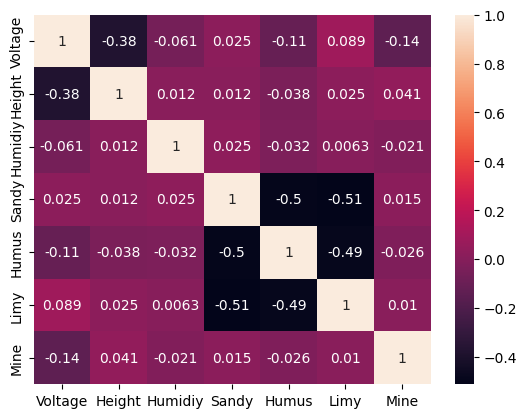

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns



sns.heatmap(DF.corr(), annot=True)

Бачимо сильну від'ємну кореляцію різних типів землі, що зрозуміло, оскільки за побудовою земля одночасно може бути тільки одного із цих трьох типів.

Також бачимо значущу кореляцію висоти вимірювання та сили "магнітної аномалії", що також очікувано (напевно? я не фізик), оскільки чим більша відстань, тим слабшим має бути вимірювання.

['Voltage', 'Height', 'Humidiy', 'Sandy', 'Humus']


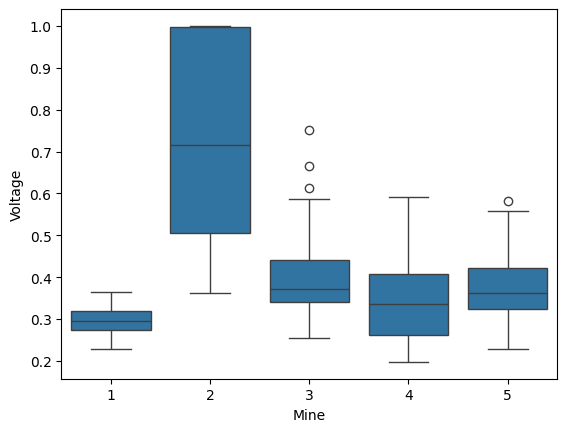

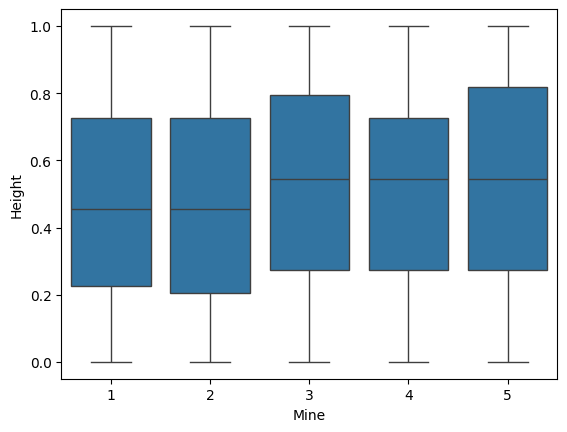

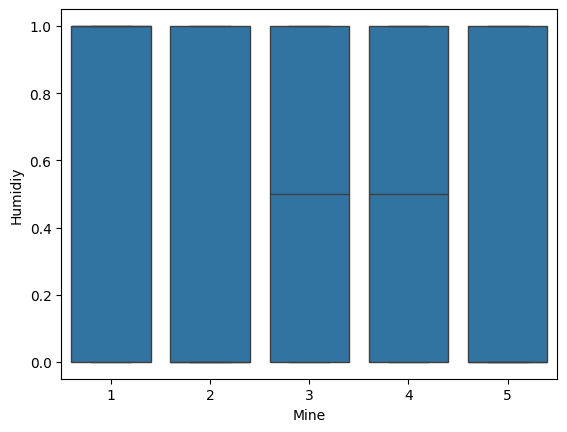

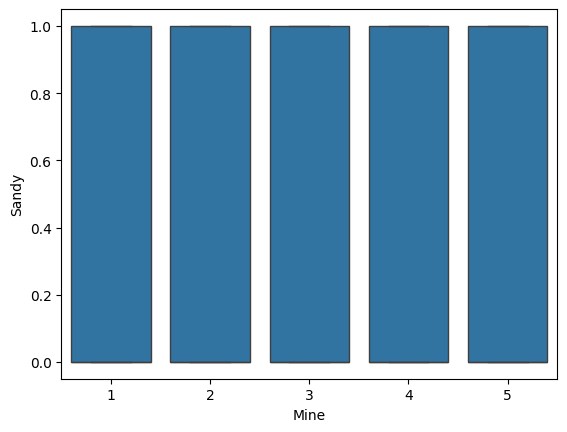

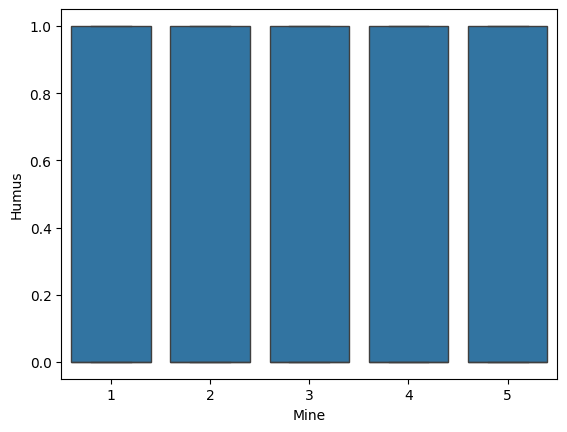

In [17]:
feature_names = list(DF.columns.values)[:-2]
print(feature_names)

for i in range(len(feature_names)):
    figure = plt.figure()
    ax = sns.boxplot(x='Mine', y=feature_names[i], data=DF)

# KNN
